In [1]:
#libraries
import os
import plotly.express as px
import numpy as np
import pandas as pd
import calendar as cl
import cartopy
import cartopy.crs as ccrs
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))
import cmocean

%matplotlib inline
import matplotlib.pyplot as plt

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
plt.ion()

libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory


In [2]:
shark2 = pd.read_csv('Shark_Temp_Salt_Clean.csv')
shark2['month_year'] = pd.to_datetime(shark2['Date']).dt.to_period('M')
shark2.head()

,Unnamed: 0,sex,organismID,year,month,day,Date,Latitude,Longitude,Temperature,Salinity,month_year
0,0,MALE,A69-9002-15967,2012,6,7,2012-06-07,-23.44,151.90,22.686416,35.471758,2012-06
1,1,MALE,A69-9002-15967,2012,6,6,2012-06-06,-23.44,151.90,22.798087,35.464934,2012-06
2,2,MALE,A69-9002-15967,2012,3,1,2012-03-01,-23.44,151.97,26.556687,35.544015,2012-03
3,3,MALE,A69-9002-15967,2012,3,21,2012-03-21,-23.43,151.94,26.179308,35.549060,2012-03
4,4,MALE,A69-9002-15967,2012,3,27,2012-03-27,-23.43,151.94,26.164600,35.559886,2012-03


In [3]:
#Split information in 2 groups males and females
male = shark2[shark2['sex'] == 'MALE' ]
female = shark2[shark2['sex'] == 'FEMALE' ]

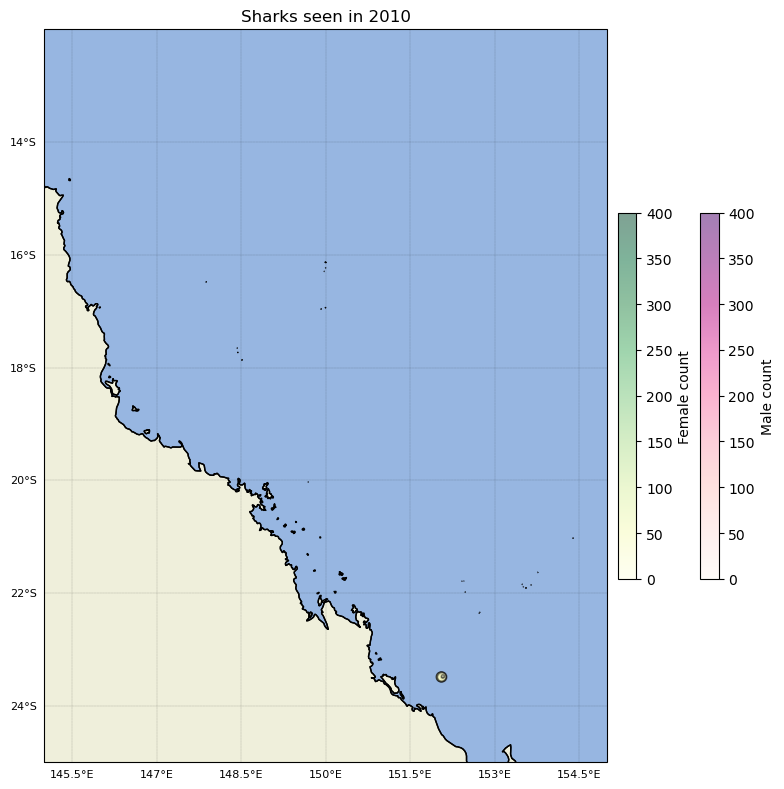

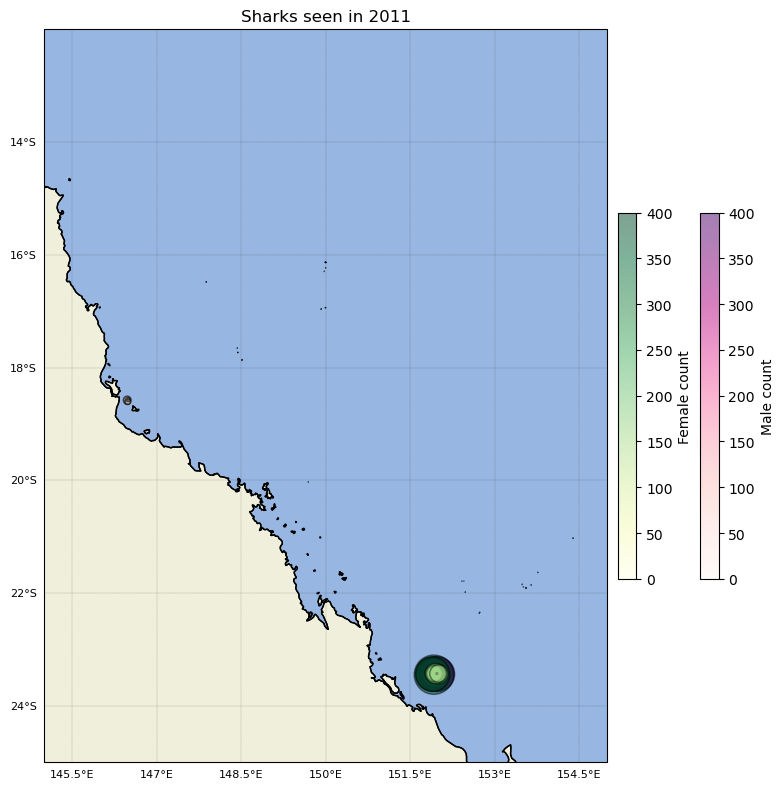

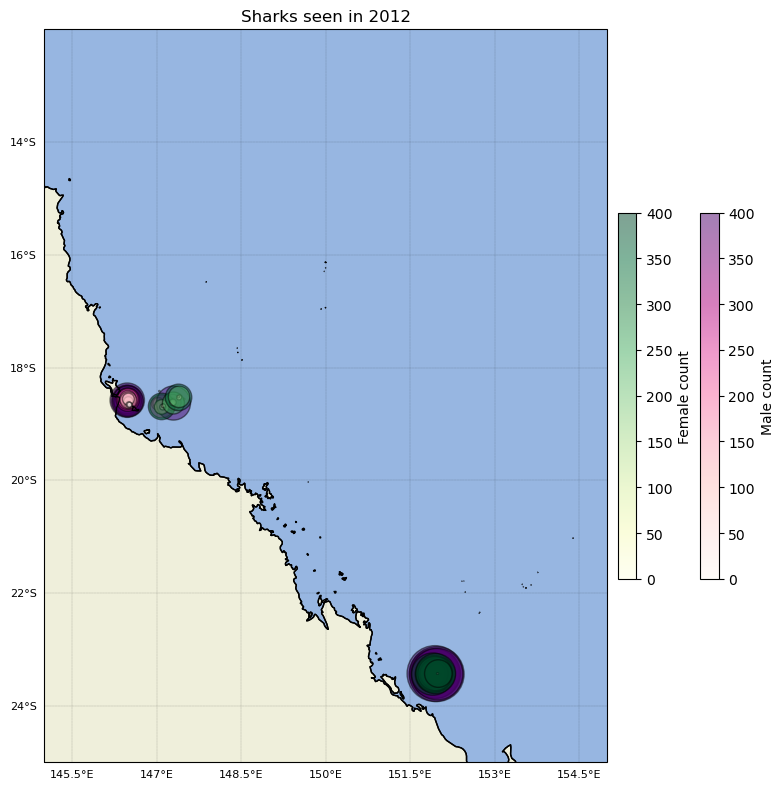

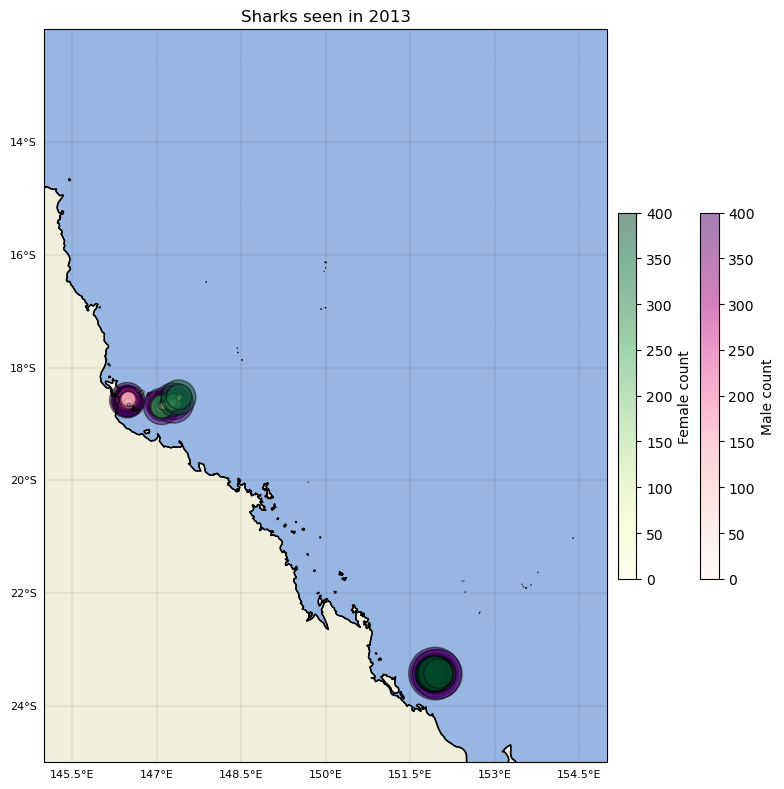

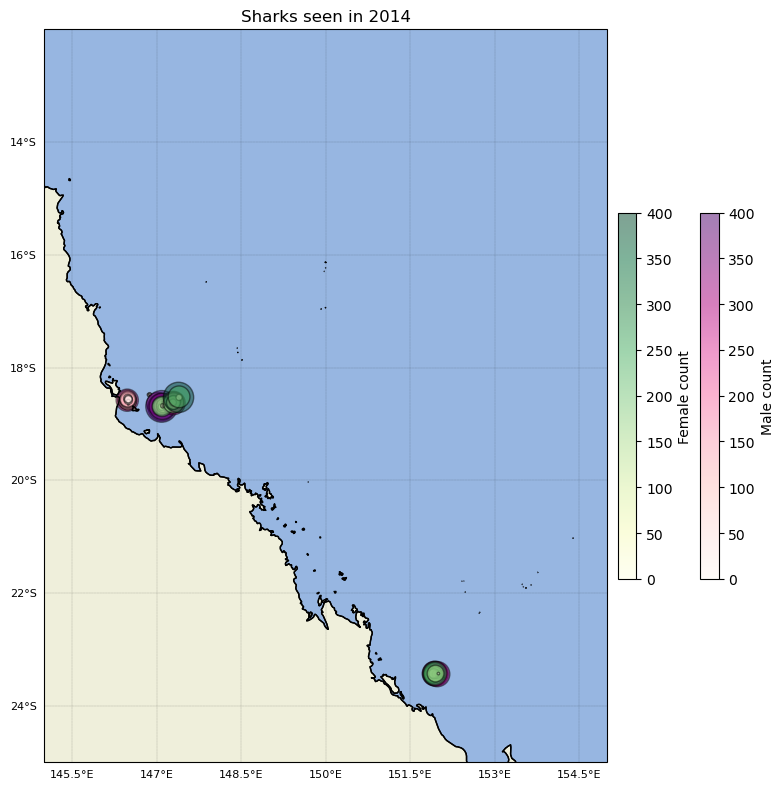

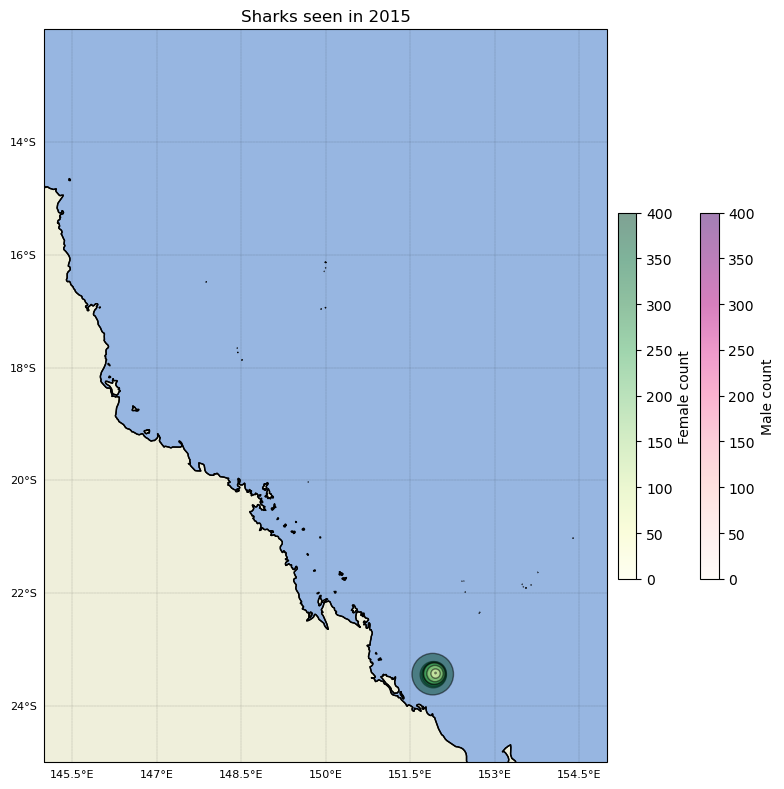

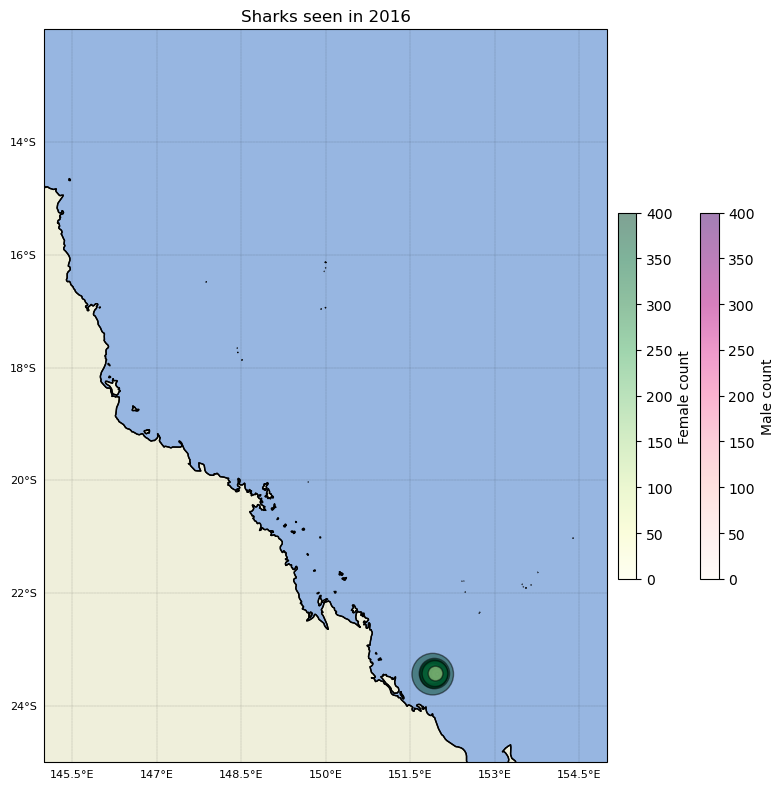

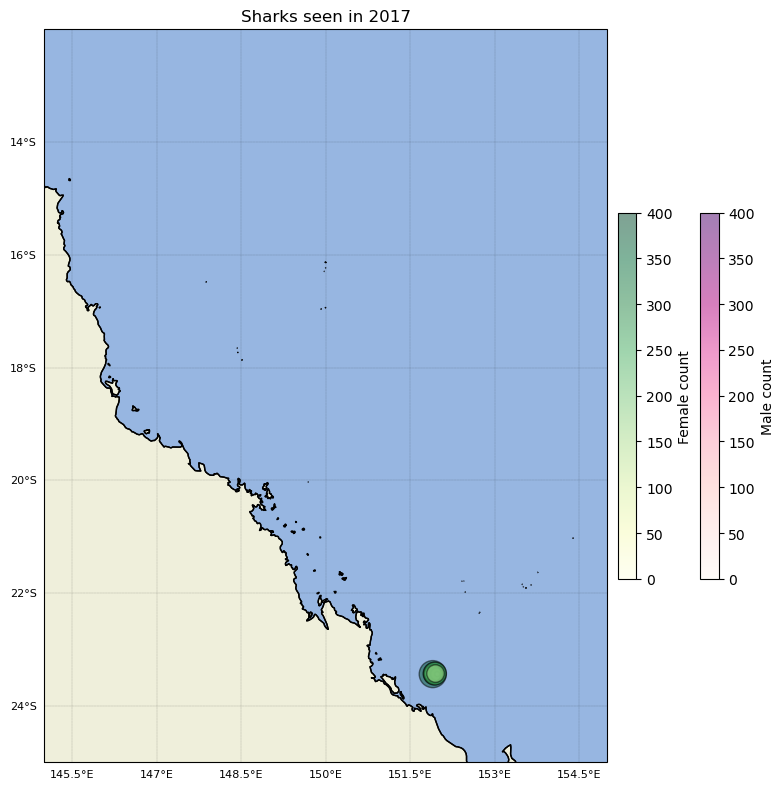

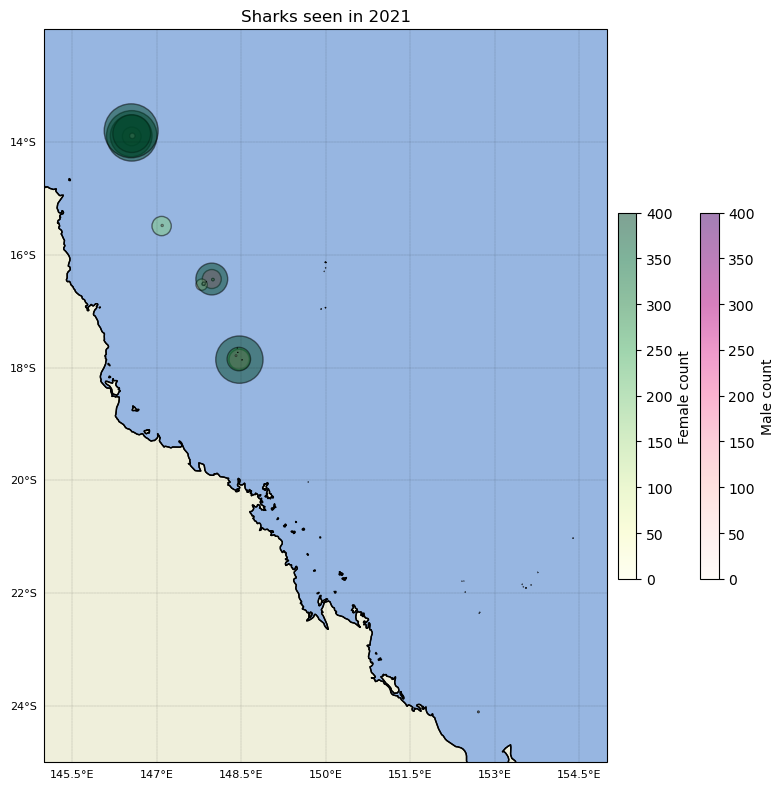

In [29]:
#create a map
ccrs.PlateCarree()

#extent 
extent = [155,145,-12,-25]

#loop for plot all the data by year 
for year in shark2.groupby('year').groups: 
    #set projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    plt.savefig('map.png')
    ax.add_feature(cartopy.feature.OCEAN, zorder=0)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
    #add features
#     ax.gridlines()
    ax.coastlines()
    x = year
    ax.set_title(f'Sharks seen in {x}')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.1, color='k', alpha=1, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8} 
    #add data
    #need to group by estation (long, lat) and plot the amount of sharks in each point
    #there are 129 points where sharks have been seen
    M = male[male['year'] == year].groupby(['Longitude','Latitude'])['month'].count().reset_index(name='counts')
    F = female[female['year'] == year].groupby(['Latitude','Longitude'])['month'].count().reset_index(name='counts')
    p1 = plt.scatter(M['Longitude'],M['Latitude'],
                c=M['counts'], alpha=0.5,
                cmap = plt.cm.RdPu,
                edgecolor='black',label='Males',s=M['counts']
               )
    cbar1 = plt.colorbar(p1,shrink=0.5, pad=-0.05)
    plt.clim(0,400)
    cbar1.set_label('Male count')
    p2 =plt.scatter(F['Longitude'],F['Latitude'],
                c=F['counts'], alpha=0.5,
                cmap = plt.cm.YlGn,
                edgecolor='black',label='Males',s=F['counts']
               )
    cbar2 = plt.colorbar(p2,shrink=0.5, pad=0.012)
    plt.clim(0,400)
    cbar2.set_label('Female count')
    #plot figure
    plt.tight_layout()
    plt.show()

In [5]:
def plotSharkvsTemp(dataserie, trange, dtemp=0.5):
    tempbins = np.arange(trange[0],trange[1],dtemp)
    count, division = np.histogram(dataserie,bins=tempbins)
    return tempbins[:-1]+dtemp/2,count
    
def plotSharkvsSalinity(dataserie, srange, dsalt=0.1):
    saltbins = np.arange(srange[0],srange[1],dsalt)
    count, division = np.histogram(dataserie,bins=saltbins)
    return saltbins[:-1]+dsalt/2,count


tempxmale, tcountmale = plotSharkvsTemp(male.Temperature, trange=[20,32], dtemp=1)
tempxfemale, tcountfemale = plotSharkvsTemp(female.Temperature, trange=[20,32], dtemp=1)

saltxmale, scountmale = plotSharkvsSalinity(male.Salinity, srange=[34.5,36.4], dsalt=0.2)
saltxfemale, scountfemale = plotSharkvsSalinity(female.Salinity, srange=[34.5,36.4], dsalt=0.2)
plt.rcParams['axes.axisbelow'] = True

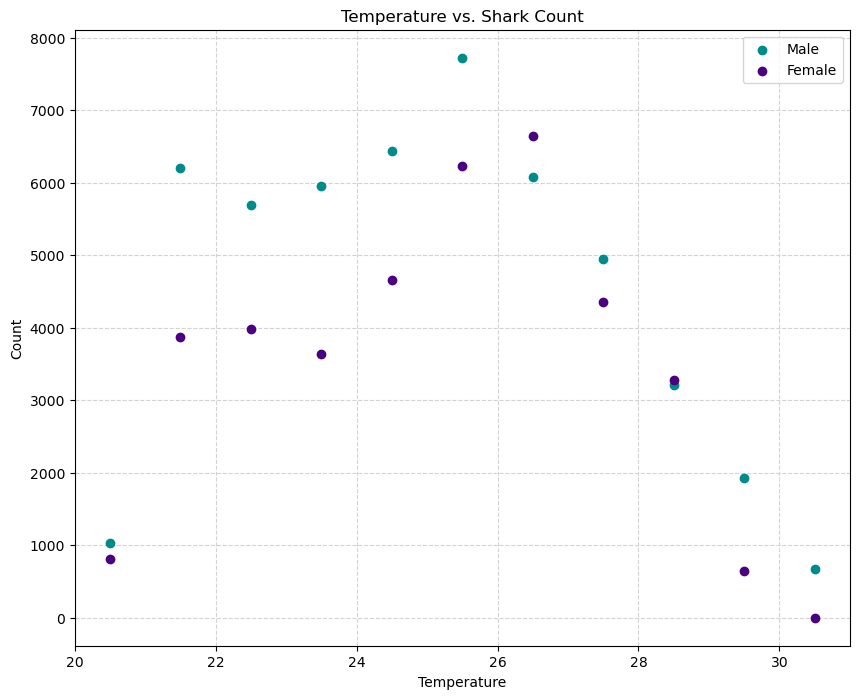

In [6]:
plt.scatter(tempxmale,tcountmale, color = 'darkcyan')
plt.scatter(tempxfemale,tcountfemale, color = 'indigo')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs. Shark Count')
plt.legend(["Male" , "Female"] )
plt.grid(True,color='lightgray', linestyle='dashed')
plt.rcParams['axes.axisbelow'] = True

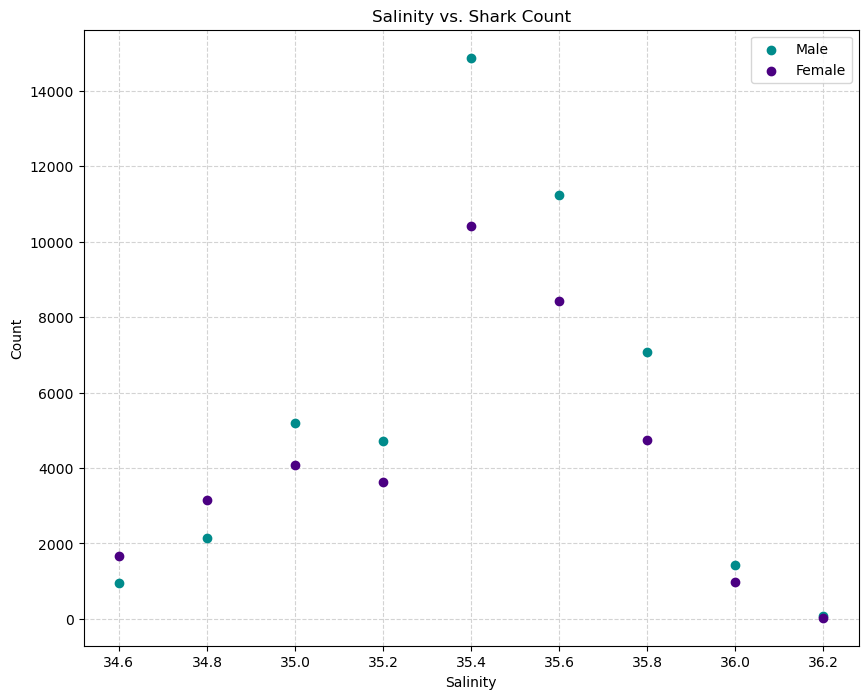

In [7]:
plt.scatter(saltxmale,scountmale,color = 'darkcyan' ); 
plt.scatter(saltxfemale,scountfemale, color = 'indigo')
plt.xlabel('Salinity')
plt.ylabel('Count')
plt.title('Salinity vs. Shark Count')
plt.legend(["Male" , "Female"] )
plt.grid(True,color='lightgray', linestyle='dashed')